# WeatherPy

---

### In this deliverable, a Python script was used to visualize the weather of over 500 cities of varying distances from the equator via the OpenWeatherMap APILinks to an external site; a representative linear regression model of weather across cities vs their latutudes was then analyzed. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
weather_api_key = "1f0e87e9cdea6849dcd501da0386aefd"
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
print(weather_api_key)

1f0e87e9cdea6849dcd501da0386aefd


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# ...


# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | conakry
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | winslow
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | wahiawa
Processing Record 12 of Set 1 | clyde river
Processing Record 13 of Set 1 | griffith
Processing Record 14 of Set 1 | yulara
Processing Record 15 of Set 1 | ridgecrest
Processing Record 16 of Set 1 | laharpur
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
P

Processing Record 38 of Set 4 | chokurdakh
Processing Record 39 of Set 4 | nikolskoye
Processing Record 40 of Set 4 | bristol
Processing Record 41 of Set 4 | vardo
Processing Record 42 of Set 4 | chuy
Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | bambous virieux
Processing Record 45 of Set 4 | kruisfontein
Processing Record 46 of Set 4 | halalo
City not found. Skipping...
Processing Record 47 of Set 4 | coihaique
Processing Record 48 of Set 4 | wajima
Processing Record 49 of Set 4 | borogontsy
Processing Record 0 of Set 5 | la ronge
Processing Record 1 of Set 5 | praia da vitoria
Processing Record 2 of Set 5 | ko samui
Processing Record 3 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 4 of Set 5 | vila velha
Processing Record 5 of Set 5 | pangai
Processing Record 6 of Set 5 | henties bay
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | pachino
Processing Record 9 of Set 5 | lhokseumawe
Process

Processing Record 27 of Set 8 | airai
Processing Record 28 of Set 8 | lavrentiya
Processing Record 29 of Set 8 | kilosa
Processing Record 30 of Set 8 | wanning
Processing Record 31 of Set 8 | poso
Processing Record 32 of Set 8 | oranjemund
Processing Record 33 of Set 8 | quelimane
Processing Record 34 of Set 8 | herrin
Processing Record 35 of Set 8 | araouane
Processing Record 36 of Set 8 | filingue
Processing Record 37 of Set 8 | zhigansk
Processing Record 38 of Set 8 | roebourne
Processing Record 39 of Set 8 | namatanai
Processing Record 40 of Set 8 | port hedland
Processing Record 41 of Set 8 | karratha
Processing Record 42 of Set 8 | paamiut
Processing Record 43 of Set 8 | talnakh
Processing Record 44 of Set 8 | itarema
Processing Record 45 of Set 8 | athabasca
Processing Record 46 of Set 8 | paita
Processing Record 47 of Set 8 | ziro
Processing Record 48 of Set 8 | presidente prudente
Processing Record 49 of Set 8 | goya
Processing Record 0 of Set 9 | fukue
Processing Record 1 of 

Processing Record 19 of Set 12 | hamilton
Processing Record 20 of Set 12 | buala
Processing Record 21 of Set 12 | sao jose do belmonte
Processing Record 22 of Set 12 | chute-aux-outardes
Processing Record 23 of Set 12 | jiexiu
Processing Record 24 of Set 12 | thunder bay
Processing Record 25 of Set 12 | tshela
Processing Record 26 of Set 12 | manaure
Processing Record 27 of Set 12 | selenginsk
Processing Record 28 of Set 12 | limin khersonisou
Processing Record 29 of Set 12 | olafsvik
Processing Record 30 of Set 12 | ust-kuyga
Processing Record 31 of Set 12 | bonavista
Processing Record 32 of Set 12 | sivas
Processing Record 33 of Set 12 | hami
Processing Record 34 of Set 12 | buchanan
Processing Record 35 of Set 12 | tingrela
City not found. Skipping...
Processing Record 36 of Set 12 | kongolo
Processing Record 37 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 38 of Set 12 | baykit
Processing Record 39 of Set 12 | fevralsk
City not found. Skipping...
Processing Rec

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Convert max temp column from Kelvin to Fahrenheit
city_data_df["Max Temp"] = (city_data_df["Max Temp"] - 273.15) * 9/5 + 32


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,conakry,9.5380,-13.6773,80.672,83,5,3.09,GN,1676940176
1,punta arenas,-53.1500,-70.9167,57.308,67,100,13.38,CL,1676940165
2,bredasdorp,-34.5322,20.0403,58.694,63,99,4.20,ZA,1676940173
3,winslow,35.0242,-110.6974,62.780,23,0,4.63,US,1676940199
4,ribeira grande,38.5167,-28.7000,60.782,85,100,4.02,PT,1676940200


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,conakry,9.5380,-13.6773,80.672,83,5,3.09,GN,1676940176
1,punta arenas,-53.1500,-70.9167,57.308,67,100,13.38,CL,1676940165
2,bredasdorp,-34.5322,20.0403,58.694,63,99,4.20,ZA,1676940173
3,winslow,35.0242,-110.6974,62.780,23,0,4.63,US,1676940199
4,ribeira grande,38.5167,-28.7000,60.782,85,100,4.02,PT,1676940200


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

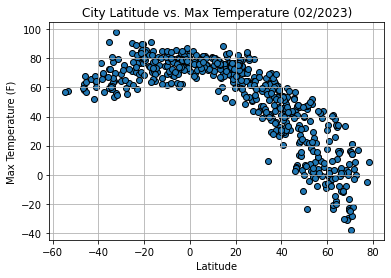

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (02/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

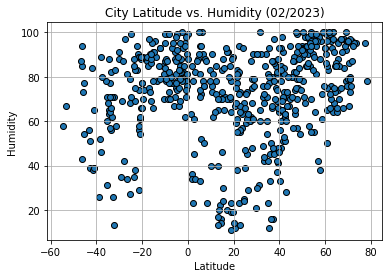

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (02/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

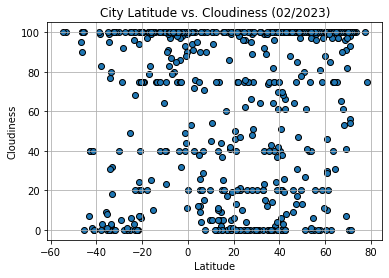

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (02/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

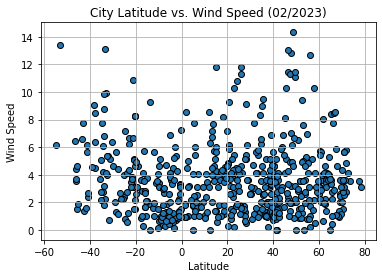

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (02/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot the scatter plot and the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add other graph properties
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,conakry,9.5380,-13.6773,80.672,83,5,3.09,GN,1676940176
3,winslow,35.0242,-110.6974,62.780,23,0,4.63,US,1676940199
4,ribeira grande,38.5167,-28.7000,60.782,85,100,4.02,PT,1676940200
5,butaritari,3.0707,172.7902,79.682,82,100,3.19,KI,1676940156
7,ilulissat,69.2167,-51.1000,-0.382,78,41,3.60,GL,1676940200


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,57.308,67,100,13.38,CL,1676940165
2,bredasdorp,-34.5322,20.0403,58.694,63,99,4.20,ZA,1676940173
6,atuona,-9.8000,-139.0333,78.422,78,23,4.65,PF,1676940171
12,yulara,-25.2406,130.9889,90.680,27,0,2.40,AU,1676940182
15,busselton,-33.6500,115.3333,77.702,56,2,2.22,AU,1676940165


###  Temperature vs. Latitude Linear Regression Plot

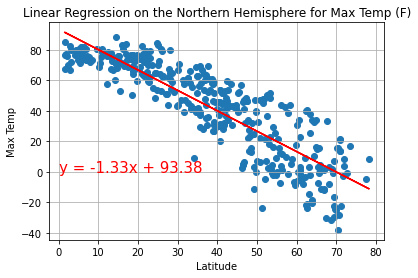

The r-value is: -0.8698290793340185


In [17]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Linear Regression on the Northern Hemisphere for Max Temp (F)", 
                       "Max Temp", (0, 0))
print(f"The r-value is: {rvalue}")

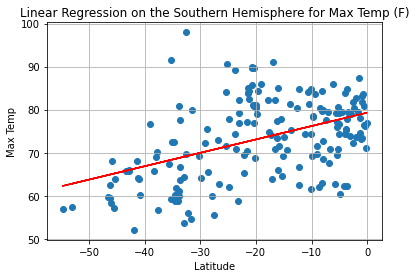

The r-value is: 0.4593642732539967


In [18]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Linear Regression on the Southern Hemisphere for Max Temp (F)", 
                       "Max Temp", (0, 0))
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 

- Northern Hemisphere for Max Temp (F) has strong negative correlation between variables, thus as latitude increases the Max temp (F) decreases respectively.
- Southern Hemisphere for Max Temp (F) has fairly week postive correlation betwen variables, thus I can't make any strong inferences with this curretn dataset. Further analysis is needed. 

### Humidity vs. Latitude Linear Regression Plot

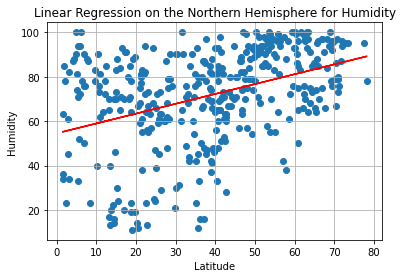

The r-value is: 0.39793455754024737


In [19]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Linear Regression on the Northern Hemisphere for Humidity", 
                       "Humidity", (0, 0))
print(f"The r-value is: {rvalue}")

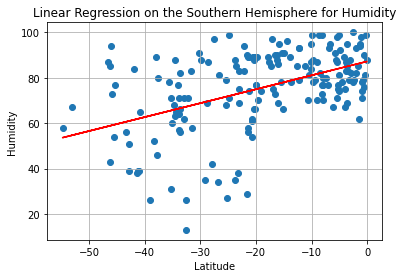

The r-value is: 0.4777324693728711


In [20]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Linear Regression on the Southern Hemisphere for Humidity", 
                       "Humidity", (0, 0))
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 

- Both the Northern & Southern Hemisphere have fairly week postive correlation betwen variables, thus I can't make any strong inferences with this current dataset. Further analysis is needed. However it does appear the Nothern Hemisphere dataset these variables do not have much correlation at all. 

### Cloudiness vs. Latitude Linear Regression Plot

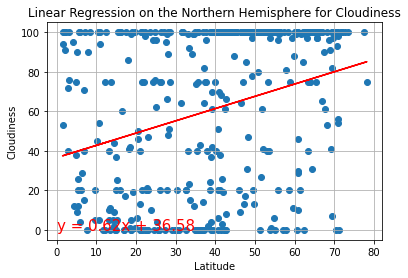

The r-value is: 0.3001571162641313


In [21]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Linear Regression on the Northern Hemisphere for Cloudiness", 
                       "Cloudiness", (0, 0))
print(f"The r-value is: {rvalue}")

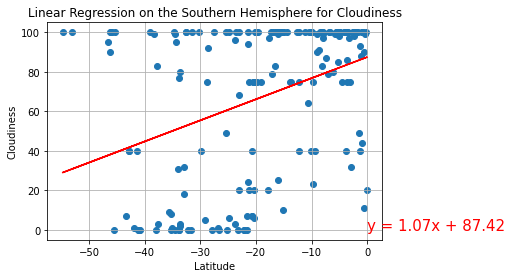

The r-value is: 0.37273491023566974


In [22]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Linear Regression on the Southern Hemisphere for Cloudiness", 
                       "Cloudiness", (0, 0))
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 
- The doesn't seem to be any correlation with these variables, further analysis is needed. 

### Wind Speed vs. Latitude Linear Regression Plot

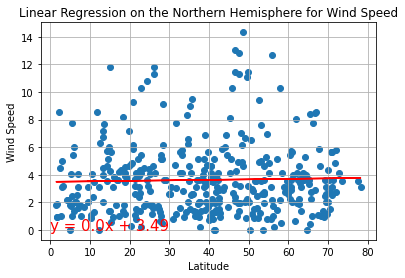

The r-value is: 0.02714473988686797


In [23]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Linear Regression on the Northern Hemisphere for Wind Speed", 
                       "Wind Speed", (0, 0))
print(f"The r-value is: {rvalue}")

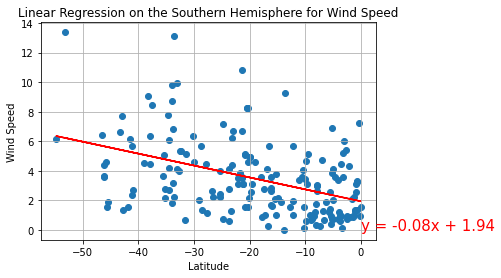

The r-value is: -0.4350572933633802


In [24]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Linear Regression on the Southern Hemisphere for Wind Speed", 
                       "Wind Speed", (0, 0))
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 

- Northern Hemisphere for Wind Speed doesn't have much correlation at all
- Southern Hemisphere for Wind Speed seem to show some weak negative correlation betwen variables, thus I can't make any strong inferences with this curretn dataset. Further analysis is needed. 